<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regression 
* customer analysis

In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes 
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# regression

In [32]:
raw = skd.load_breast_cancer()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<BarContainer object of 10 artists>

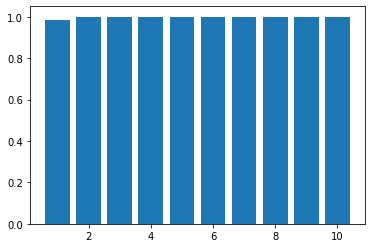

In [33]:
pca = PCA(n_components = 10)
fit_pca = pca.fit_transform(x)
plt.bar(range(1,11), pca.explained_variance_ratio_.cumsum())

In [34]:
res_pca = pd.DataFrame(np.c_[fit_pca, y.reshape(-1,1)], columns = [f'pc{a}' for a in range(1,11)] + ['target'])
res_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,0.0
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,0.0
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,0.0
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,0.0
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,0.0


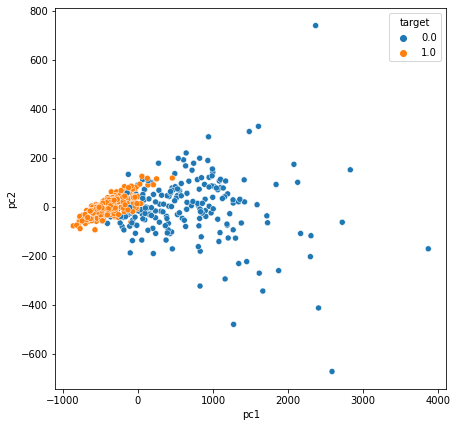

In [35]:
plt.figure(figsize = [7,7])
sns.scatterplot(data = res_pca, x = 'pc1', y = 'pc2', hue = 'target')

In [36]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [37]:
scaler = StandardScaler()
x_tr_std = scaler.fit_transform(x_tr)
x_te_std = scaler.transform(x_te)

In [40]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
fit_rf_std = RandomForestClassifier().fit(x_tr_std, y_tr)

pred_rf = fit_rf.predict(x_te)
pred_rf_std = fit_rf.predict(x_te_std)

proba_rf = fit_rf.predict_proba(x_te)[:,-1]
proba_rf_std = fit_rf.predict_proba(x_te_std)[:,-1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [41]:
accuracy_score(y_te, pred_rf), accuracy_score(y_te, pred_rf_std)

(0.9473684210526315, 0.6491228070175439)

In [43]:
fpr1, tpr1, thre1 = roc_curve(y_te, proba_rf)
fpr2, tpr2, thre2 = roc_curve(y_te, proba_rf_std)


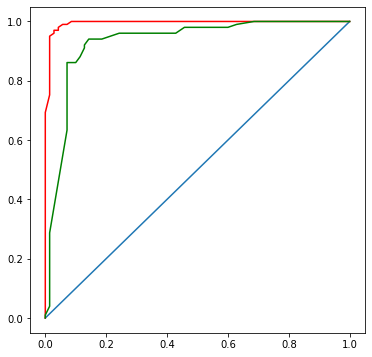

In [45]:
plt.figure(figsize = [6,6])
plt.plot([0,1], [0,1])
plt.plot(fpr1, tpr1, color = 'red')
plt.plot(fpr2, tpr2, color = 'green')

# customer analysis

In [46]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 'retail_data_transactions.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ecommerce-data.csv',
 'rfm_test.csv',
 'retail_data_response.csv',
 'sample_data']

In [47]:
df = pd.read_csv('retail_data_transactions.csv')
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [48]:
df.columns = ['id', 'date', 'rev']
df.head()

,id,date,rev
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [49]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,rev
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [59]:
df = df.sort_values(['id', 'date'], ascending = [1,0])
df.head()

,id,date,rev,month
5650,CS1112,2015-01-14,39,2015-01-01
31500,CS1112,2014-12-04,59,2014-12-01
17810,CS1112,2014-07-16,90,2014-07-01
26626,CS1112,2014-04-29,63,2014-04-01
74842,CS1112,2013-11-13,71,2013-11-01


In [60]:
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df.head()

,id,date,rev,month
5650,CS1112,2015-01-14,39,2015-01-01
31500,CS1112,2014-12-04,59,2014-12-01
17810,CS1112,2014-07-16,90,2014-07-01
26626,CS1112,2014-04-29,63,2014-04-01
74842,CS1112,2013-11-13,71,2013-11-01


In [94]:
info_m = df.groupby(['id', 'month']).agg({'rev':'sum'}).reset_index()
info_m = info_m.groupby(['id']).first().reset_index()
info_m.head()

,id,month,rev
0,CS1112,2011-06-01,56
1,CS1113,2011-05-01,94
2,CS1114,2011-07-01,77
3,CS1115,2011-08-01,87
4,CS1116,2011-06-01,87


In [96]:
info_m = info_m[['id', 'rev']]
info_m.columns = ['id', 'money']
info_m.head()

,id,money
0,CS1112,56
1,CS1113,94
2,CS1114,77
3,CS1115,87
4,CS1116,87


In [63]:
df.head()

,id,date,rev,month
5650,CS1112,2015-01-14,39,2015-01-01
31500,CS1112,2014-12-04,59,2014-12-01
17810,CS1112,2014-07-16,90,2014-07-01
26626,CS1112,2014-04-29,63,2014-04-01
74842,CS1112,2013-11-13,71,2013-11-01


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


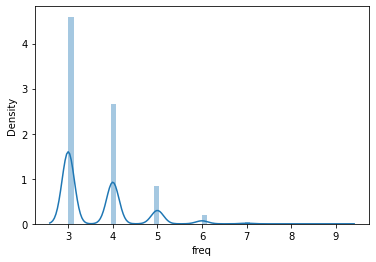

In [123]:
info_f = df.groupby(['id', 'month']).agg({'date':'size'}).reset_index()
cnt_finfo_freq = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'date').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq')
info_f = info_f.sort_values(['id', 'month'])
info_f = info_f.groupby('id').head(3)
info_f = info_f.groupby('id').agg({'freq':'sum'}).reset_index()
sns.distplot(info_f['freq'])

In [66]:
info_r = df.groupby(['id'])['date'].apply(lambda x : x.iloc[0] - x.iloc[1]).reset_index()
info_r.head()

,id,date
0,CS1112,41 days
1,CS1113,0 days
2,CS1114,43 days
3,CS1115,260 days
4,CS1116,78 days


In [138]:
info = pd.merge(info_m, info_r, 'left', 'id')
info = pd.merge(info, info_f, 'left', 'id')
info.head()

,id,money,date,freq
0,CS1112,56,41 days,3
1,CS1113,94,0 days,3
2,CS1114,77,43 days,5
3,CS1115,87,260 days,4
4,CS1116,87,78 days,3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


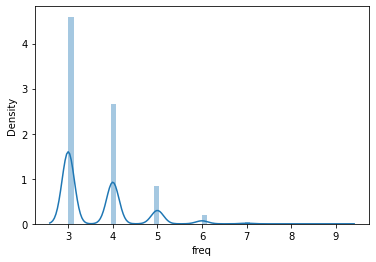

In [139]:
sns.distplot(info['freq'])

In [140]:
info = info.assign(m = pd.qcut(info['money'], 5, list('54321')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            r = pd.qcut(info['date'].dt.days, 5, list('12345'))
            )
info.head()

,id,money,date,freq,m,f,r
0,CS1112,56,41 days,3,4,5,2
1,CS1113,94,0 days,3,2,5,1
2,CS1114,77,43 days,5,3,1,3
3,CS1115,87,260 days,4,2,3,5
4,CS1116,87,78 days,3,2,5,4


In [141]:
info = info.assign(rfm = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,money,date,freq,m,f,r,rfm
0,CS1112,56,41 days,3,4,5,2,25
1,CS1113,94,0 days,3,2,5,1,15
2,CS1114,77,43 days,5,3,1,3,31
3,CS1115,87,260 days,4,2,3,5,53
4,CS1116,87,78 days,3,2,5,4,45


In [135]:
seg_map = {
    r'[1-2][1-2]' : 'hibernating',
    r'[1-2][3-4]' : 'at_risk',
    r'[1-2]5' : 'cant_loose',
    r'3[1-2]' : 'about_to_sleep',
    r'33' : 'need_attention',
    r'[3-4][4-5]' : 'loyal_customers',
    r'41' : 'promising',
    r'51' : 'new_customers',
    r'[4-5][2-3]' : 'potential_loyalist',
    r'5[4-5]' : 'champions'
}

In [143]:
info = info.assign(rfm = info['rfm'].replace(seg_map, regex = True))
info.head()

,id,money,date,freq,m,f,r,rfm
0,CS1112,56,41 days,3,4,5,2,cant_loose
1,CS1113,94,0 days,3,2,5,1,cant_loose
2,CS1114,77,43 days,5,3,1,3,about_to_sleep
3,CS1115,87,260 days,4,2,3,5,potential_loyalist
4,CS1116,87,78 days,3,2,5,4,loyal_customers


In [152]:
cnt_info = info.groupby(['rfm', 'm']).agg({'id':'size'}).reset_index()
cnt_info.head()

,rfm,m,id
0,about_to_sleep,5,73
1,about_to_sleep,4,82
2,about_to_sleep,3,71
3,about_to_sleep,2,123
4,about_to_sleep,1,182


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


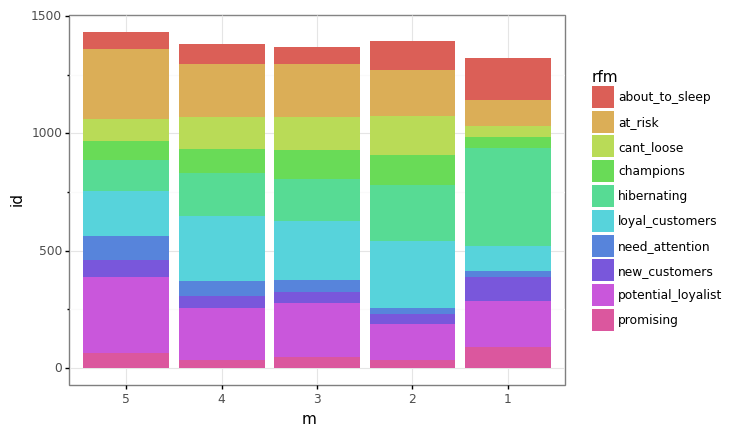

<ggplot: (8768306463245)>

In [153]:
(
    ggplot(cnt_info, aes('m', 'id', fill = 'rfm')) +
    gg.geom_col() +
    gg.theme_bw()
)